In [1]:
import random
import copy
import pickle
import pandas as pd


In [2]:
def roll_dice(type_dice, how_many):
    total = 0
    total += random.randint(1,type_dice)
    return total

In [3]:
class Titan:
    def __init__(self, name, ac, strength, init, hp, attacks, damage):
        self.name = name
        self.ac = ac
        self.strength = strength
        self.init = init
        self.total_hp = hp
        self.hp = hp
        self.attacks = attacks
        self.damage = damage
        self.dead = False
        self.missed = 0
    
    def attack(self, titan):
        for i in range(self.attacks):
            total_attack = roll_dice(20, 1) + self.strength
            if total_attack > titan.ac:
                total_damage = roll_dice(self.damage, 1) + self.strength
                print(self.name, 'deals', total_damage, 'damage to', titan.name)
                titan.lose_hp(total_damage)
            else:
                print(self.name, 'misses attack')
                self.missed += 1
    
    def lose_hp(self, wound):
        self.hp -= wound
        if self.hp<=0:
            self.die()
    
    def die(self):
        self.dead = True
        

In [106]:
class AttackTitan(Titan):
    def __init__(self):
        self.name = 'Attack Titan'
        self.ac = 15
        self.strength = 5
        self.init = 2
        self.total_hp = 50
        self.hp = 50
        self.attacks = 3
        self.damage = 12
        self.dead = False
        self.missed = 0

class ArmouredTitan(Titan):
    def __init__(self):
        self.name = 'Armoured Titan'
        self.ac = 17
        self.strength = 4
        self.init = 1
        self.total_hp = 60
        self.hp = 60
        self.attacks = 1
        self.damage = 10
        self.dead = False
        self.missed = 0 
        
class ColossalTitan(Titan):
    def __init__(self):
        self.name = 'Colossal Titan'
        self.ac = 10
        self.strength = 6
        self.init = 0
        self.total_hp = 80
        self.hp = 100
        self.attacks = 1
        self.damage = 12
        self.dead = False
        self.missed = 0 

class BeastTitan(Titan):
    def __init__(self):
        self.name = 'Beast Titan'
        self.ac = 13
        self.strength = 2
        self.init = 1
        self.total_hp = 40
        self.hp = 40
        self.attacks = 1
        self.damage = 10
        self.dead = False
        self.missed = 0 
        

class WarhammerTitan(Titan):
    def __init__(self):
        self.name = 'Warhammer Titan'
        self.ac = 15
        self.strength = 5
        self.init = 2
        self.total_hp = 50
        self.hp = 50
        self.attacks = 2
        self.damage = 12
        self.dead = False
        self.missed = 0
    
    def attack(self, titan):
        for i in range(self.attacks):
            total_attack = roll_dice(20, 1) + self.strength - 3
            if total_attack > titan.ac:
                total_damage = roll_dice(self.damage, 1) + self.strength + 10
                print(self.name, 'deals', total_damage, 'damage to', titan.name)
                titan.lose_hp(total_damage)
            else:
                print(self.name, 'misses attack')
                self.missed += 1
                
class FemaleTitan(Titan):
    def __init__(self):
        self.name = 'Female Titan'
        self.ac = 15
        self.strength = 4
        self.init = 3
        self.total_hp = 40
        self.hp = 40
        self.attacks = 2
        self.damage = 12
        self.dead = False
        self.missed = 0 
        
class CartTitan(Titan):
    def __init__(self):
        self.name = 'Cart Titan'
        self.ac = 13
        self.strength = 3
        self.init = 1
        self.total_hp = 40
        self.hp = 40
        self.attacks = 1
        self.damage = 12
        self.dead = False
        self.missed = 0 

In [75]:
def initiative_phase(titan_1, titan_2):
    attack_order = []
    init_score_1 = roll_dice(20,1) + titan_1.init
    init_score_2 = roll_dice(20,1) + titan_2.init
    if init_score_1 > init_score_2:
        attack_order = [1,2]
    elif init_score_1 < init_score_2:
        attack_order = [2,1]
    else:
        draw = roll_dice(100,1)
        if draw >= 50:
            attack_order = [1,2]
        else:
            attack_order = [2,1]
    return attack_order


def combat_phase(titan_1, titan_2, attack_order):
    titans_dict = {1:titan_1, 2:titan_2}
    for i in attack_order:
        attacker = titans_dict[i]
        defender = titans_dict[[x for x in attack_order if x != i][0]]
        if not attacker.dead and not defender.dead:
            attacker.attack(defender)
        elif attacker.dead:
            print(attacker.name, 'cannot attack because he is dead')
        elif defender.dead:
            print(defender.name, 'cannot be attacked because he is dead')
            
def duel(titan_1, titan_2):
    attack_order = initiative_phase(titan_1, titan_2)
    print(attack_order)
    print('\n')
    turn_count = 0
    result = {}
    while not titan_1.dead and not titan_2.dead:
        combat_phase(titan_1, titan_2, attack_order)
        turn_count +=1
        print('\n')
    if titan_1.dead:
        print('The winner is', titan_2.name)
        result = {'winner':titan_2, 'loser':titan_1, 'turns':turn_count}
    elif titan_2.dead:
        print('The winner is', titan_1.name)
        result = {'winner':titan_1, 'loser':titan_2, 'turns':turn_count}
    return result
    

In [125]:
titan_1_list = []
titan_2_list = []
total_damage_1_list = []
total_damage_2_list = []
missed_1_list = []
missed_2_list = []
winner_list = []
turns_list = []


for i in range (10000):
    titan_1 = CartTitan()
    titan_2 = FemaleTitan()

    result = duel(titan_1, titan_2)

    titan_1_list.append(titan_1.name)
    titan_2_list.append(titan_2.name)
    if titan_2.hp<0:
        titan_2.hp = 0
    total_damage_1_list.append(titan_2.total_hp - titan_2.hp)
    if titan_1.hp <0:
        titan_1.hp = 0
    total_damage_2_list.append(titan_1.total_hp - titan_1.hp)
    missed_1_list.append(titan_1.missed)
    missed_2_list.append(titan_2.missed)
    winner_list.append(result['winner'].name)
    turns_list.append(result['turns'])


d = {
    
    'titan_1':titan_1_list,
    'titan_2':titan_2_list,
    'total_damage_1':total_damage_1_list,
    'total_damage_2':total_damage_2_list,
    'missed_1':missed_1_list,
    'missed_2':missed_2_list,
    'winner':winner_list,
    'turns':turns_list
}

raw_results = pd.DataFrame(data=d)


[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan



Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan de

Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Car

Female Titan deals 5 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


The win

Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan mis

Cart Titan deals 9 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


The winner is Female 

Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female

Cart Titan deals 14 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Ca

Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 8 damage to Female Titan
Female Titan deals 6 damage to C

Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 7 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Tit

The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 5 da

Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Car

Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Tita

Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female 

Female Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 12 d

Female Titan deals 6 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack

Female Titan deals 10 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart 

Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 14 damag

Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


The winner is Cart Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses 

Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 9 damag

Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 6 damage 

Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Tit

Female Titan deals 14 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 4 damage to Female 

Cart Titan deals 9 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is d



Female Titan misses attack
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


The winner is Cart Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Ca

Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


The winner is Cart Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


F

Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 10 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Tit

Cart Titan deals 13 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Fe

Female Titan deals 6 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deal

Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Fem

The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Tit

Female Titan deals 7 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack becau

Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Tita



Female Titan deals 7 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan misses attac

Female Titan deals 11 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Fem

Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart 

Female Titan deals 10 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Cart Titan misses a

Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misse

Cart Titan deals 13 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 7 damage t

Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[2, 1]


Fem

Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 11 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Fe

Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan 

Cart Titan deals 12 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Ti

Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 11 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Fema

Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Ti

Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan miss


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Tit

Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan mis

Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Car

Cart Titan deals 7 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Tit

Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses atta

Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan misses

[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart T

Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 dam


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan

Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


The winner is Female

Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan 

Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan d

Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart

Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan

Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan d

Cart Titan deals 9 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
F

Cart Titan deals 9 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[2, 1]


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attac

Cart Titan deals 9 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses a

Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack 

Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Fem


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to C

Cart Titan deals 15 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 10 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


The wi

Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage 

Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses

Cart Titan deals 14 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 10 damage 



Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses

The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart 

Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan canno

Cart Titan deals 9 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan

Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses

Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to 

Female Titan deals 11 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is d

Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female 

The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 7 damage to Female Titan
Femal

Female Titan deals 11 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan m

Female Titan deals 8 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


The winner is Cart Titan
[1, 2]


Ca

Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Fema



Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage 

Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 dama

Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan de

Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 5 

Cart Titan deals 11 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 16 damage to Cart 

Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Ti

Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damag

Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attac

Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 15 damage 

Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Fe


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 15 d

Female Titan deals 9 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan m

Cart Titan deals 6 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Ca


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack



Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 


Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Tita

Female Titan deals 14 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan d

Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot att

Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Tita

Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 14 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 5 damage to Car

Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Tit

Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is 

Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 dama

Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Fe

Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


The

Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female 

Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


The winner is Female Ti

Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to

Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deal

Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he i

Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Fem



The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan mis

Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Tit

Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


The winner is Cart Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan 

Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Fe

The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals

Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan m

Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deal

Cart Titan deals 10 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses 

Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 5 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan mi

Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan deals

Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to C

Cart Titan deals 4 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
F

Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 da

Female Titan deals 12 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals



Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 

Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[1, 2]


Cart 

Female Titan deals 6 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 7 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 1



Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses att

Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Tit

Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 11 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan deals 11 damag

Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 7 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Tita


Female Titan deals 12 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
C

Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]




Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan dea

Female Titan deals 9 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart


Female Titan deals 13 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cann

Female Titan deals 11 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan



Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan mis

Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Car

Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner

Cart Titan deals 11 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack

Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan de

Female Titan deals 12 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan m

Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
F

Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 6 damage to Femal

The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female 

Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 15 

Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack


Female Titan deals 8 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 5 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 10 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 da

Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan mis

Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Ti

[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals

Cart Titan deals 11 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan

Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses att

Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 d

Female Titan deals 10 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The

Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses a

Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 

Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female

Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 7 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan

Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 13

Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses


The winner is Female Titan
[1, 2]


Cart Titan deals 5 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 14 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 5 damage to Cart T

Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 5 

Cart Titan deals 13 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


The winner is Cart Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to C

Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to

Female Titan deals 13 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to

Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 14 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 11 

Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan deals

The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 5 damag

Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 15 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 7 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The

Female Titan deals 10 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
F

Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 14 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Tit

Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Th


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 14 damage to Female Titan



Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


The winner 

Female Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Tit

Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart 

Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 8 

Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 6 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to 

Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack

Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Fem

Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan cannot attack because he is dead


The winner is Cart Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack



Female Titan deals 7 damage to Cart Titan


Cart Titan deals 14 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female T

Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Tita

Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 7 damage to Female Titan
Female Titan misses attack
Female Titan 

[2, 1]


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female 

Female Titan deals 15 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 13 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 5 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Ti

Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Femal

Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Tit

Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses at



Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan

Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 10 damage to Female Titan
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 8 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan deals 14

Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 14 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because

Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 15 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Fema

Female Titan deals 7 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses atta

Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 7 damage to Femal

Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 10 damage to Female Titan
Female Titan deals 7 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 8 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 7 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female 

Female Titan deals 8 damage to Cart Titan
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 6 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Fem


Cart Titan deals 8 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 9 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan

Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 13 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 12 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 12 damage to Cart Ti

[1, 2]


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Fem

Female Titan deals 12 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 4 damage to Female Titan


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan cann

Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 9 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan deals 16 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Fem

Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female



Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 9 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 5 damage


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 9 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 4 damage to Female Titan
Female Titan deals 12 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 9 damage to Cart Titan
Female Titan deals 13 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 9 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 16 

Female Titan deals 9 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 12 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Fem

Female Titan deals 9 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 8 damage to Female Titan
Female Titan deals 6 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 16 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan deals 13 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 6 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 5 damage to Female Titan
Female Titan deals 10 damage to Cart Tita

The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 6 damage to Cart

Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 14 damage to Female Titan


Female Titan misses attack
Female Titan misses at

Female Titan deals 13 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 15 damage 

Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 12 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dea



Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 11 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Ti

Female Titan deals 8 damage to Cart Titan
Cart Titan deals 15 damage to Female Titan


Female Titan deals 16 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 13 damage to Female Titan


Female Titan misses attack
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 8 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan misses attack


Cart Titan deals 12 damage to Female Titan
Female Titan deals 8 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


Cart Titan deals 11 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan misses attack


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan deal

Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 13 damage to Female Titan
Female Titan deals 9 damage to Cart Titan
Female Titan deals 14 damage to Cart Titan


Cart Titan deals 15 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 16 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


Cart Titan deals 8 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan deals 9 damage to Female Titan
Female Titan misses attack
Fe

[2, 1]


Female Titan deals 11 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 14 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 7 damage to Cart Titan
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan deals 10 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 10 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 

Female Titan cannot attack because he is dead


The winner is Cart Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan misses attack
Female Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 11 damage to Cart Titan


Cart Titan deals 5 damage to Female Titan
Female Titan deals 10 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 12 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 11 damage to Cart Titan
Female Titan deals 7 damage to Cart Titan
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 5 damage to Cart Titan
Female Titan

Female Titan misses attack
Female Titan misses attack
Cart Titan deals 7 damage to Female Titan


Female Titan deals 7 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 10 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan deals 6 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 9 damage to Cart Titan
Female Titan deals 10 da

Female Titan deals 11 damage to Cart Titan
Female Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 16 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan deals 5 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 11 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan deals 14 dam

Female Titan deals 15 damage to Cart Titan
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 8 damage to Cart Titan
Cart Titan deals 13 damage to Female Titan


Female Titan deals 8 damage to Cart Titan
Female Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan deals 10 damage to Female Titan
Female Titan deals 5 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan misses attack
Female Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Titan deals 15 damage to Female Titan
Female Titan deals 15 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan


The winner is Female Titan
[1, 2]


Cart Titan deals 4 damage to Female Titan
Female Titan deals 5 damage to Cart Tita

The winner is Female Titan
[2, 1]


Female Titan deals 12 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 8 damage to Female Titan


Female Titan misses attack
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan misses attack
Female Titan deals 6 damage to Cart Titan
Cart Titan deals 7 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan misses attack


Female Titan deals 6 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 9 damage to Female Titan


Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan misses attack
Cart Titan deals 15 damage to Female Titan


Female Titan deals 14 damage to Cart Titan
Female Titan misses attack
Cart Titan deals 10 damage to Female Titan


Female Titan misses attack
Female Titan misses attack
Cart Titan

Cart Titan misses attack


Female Titan misses attack
Female Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan deals 15 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Female Titan deals 11 damage to Cart Titan
Female Titan misses attack


Cart Titan misses attack
Female Titan deals 6 damage to Cart Titan
Female Titan deals 6 damage to Cart Titan


The winner is Female Titan
[2, 1]


Female Titan misses attack
Female Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 8 damage to Cart Titan
Female Titan deals 15 damage to Cart Titan
Cart Titan misses attack


Female Titan deals 13 damage to Cart Titan
Female Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Female Titan
[1, 2]


Cart Titan misses attack
Female Titan misses attack
Female Titan misses attack


Cart Tit

In [126]:
raw_results.head()

titan_1       titan_2  total_damage_1  total_damage_2  missed_1  \
0  Cart Titan  Female Titan              15              40         2   
1  Cart Titan  Female Titan               7              40         2   
2  Cart Titan  Female Titan               4              40         2   
3  Cart Titan  Female Titan              24              40         1   
4  Cart Titan  Female Titan              26              40         0   

   missed_2        winner  turns  
0         3  Female Titan      4  
1         2  Female Titan      4  
2         4  Female Titan      4  
3         3  Female Titan      4  
4         0  Female Titan      3

<AxesSubplot:>

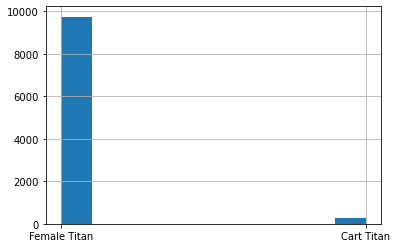

In [127]:
raw_results['winner'].hist()

In [128]:
# Aggregate stats

duel_mean_damage_1 = raw_results['total_damage_1'].mean()
duel_mean_damage_2 = raw_results['total_damage_2'].mean()

win_ratio_1 = (len(raw_results.loc[raw_results['winner'] == titan_1.name]) * 100)/len(raw_results)
win_ratio_2 = (len(raw_results.loc[raw_results['winner'] == titan_2.name]) * 100)/len(raw_results)

turns_sum = raw_results['turns'].sum()

total_attacks_1 = titan_1.attacks*turns_sum
total_hits_1 = total_attacks_1 - raw_results['missed_1'].sum()
hit_ratio_1 = (total_hits_1*100)/total_attacks_1

total_attacks_2 = titan_2.attacks*turns_sum
total_hits_2 = total_attacks_2 - raw_results['missed_2'].sum()
hit_ratio_2 = (total_hits_2*100)/total_attacks_2

mean_turns_to_win_1 = (raw_results.loc[raw_results['winner'] == titan_1.name])['turns'].mean()
mean_turns_to_win_2 = (raw_results.loc[raw_results['winner'] == titan_2.name])['turns'].mean()

d = {
    
    'win_ratio':[win_ratio_1, win_ratio_2],
    'duel_mean_damage':[duel_mean_damage_1, duel_mean_damage_2],
    'hit_ratio':[hit_ratio_1, hit_ratio_2],
    'mean_turns_to_win':[mean_turns_to_win_1, mean_turns_to_win_2]
}

stats = pd.DataFrame(data=d, index=[titan_1.name, titan_2.name])


In [129]:
stats

win_ratio  duel_mean_damage  hit_ratio  mean_turns_to_win
Cart Titan         2.57           13.5779  48.512707           5.264591
Female Titan      97.43           39.7495  55.135734           4.125937

In [130]:
raw_results.to_pickle("data/raw/cart_female_10000_v1.pkl")
stats.to_pickle("data/stats/cart_female_v1.pkl")